In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('Dataset//dengue.csv')

In [3]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [4]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [5]:
dengue['Region'] = dengue['Region'].astype('category')
dengue['Month'] = dengue['Month'].astype('category')
dengue['Year'] = dengue['Year'].astype('category')

In [6]:
dengue.dtypes

Month            category
Year             category
Region           category
Dengue_Cases        int64
Dengue_Deaths       int64
dtype: object

In [7]:
dengue.isnull().sum()

Month            0
Year             0
Region           0
Dengue_Cases     0
Dengue_Deaths    0
dtype: int64

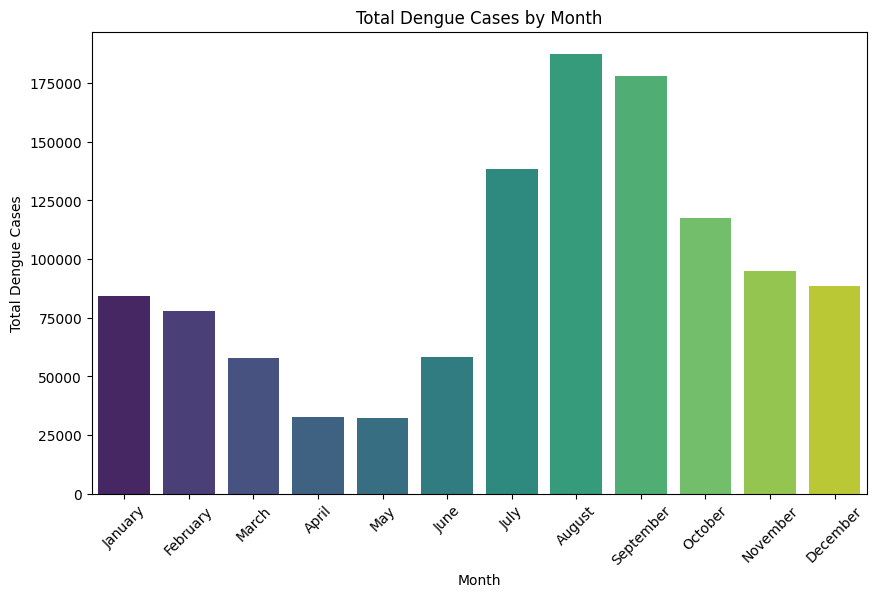

In [32]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dengue['Month'] = pd.Categorical(dengue['Month'], categories=month_order, ordered=True)
dengue_grouped = dengue.groupby("Month")["Dengue_Cases"].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=dengue_grouped.index, y=dengue_grouped.values, palette="viridis")
plt.title('Total Dengue Cases by Month')
plt.xlabel('Month')
plt.ylabel('Total Dengue Cases')
plt.xticks(rotation=45)
plt.show()

<h1> Insight 1:  Dengue cases typically begin to rise between June and September, aligning with the rainy season, which boosts mosquito breeding and facilitates virus spread.

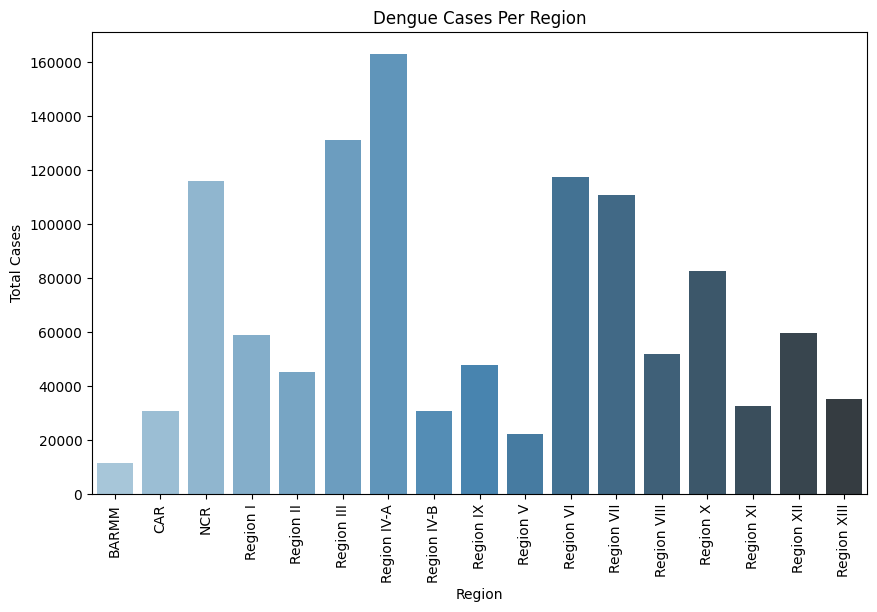

In [36]:
dengue_grouped = dengue.groupby("Region")["Dengue_Cases"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=dengue_grouped.index, y=dengue_grouped.values, palette="Blues_d")
plt.title("Dengue Cases Per Region")
plt.xlabel("Region")
plt.ylabel("Total Cases")
plt.xticks(rotation=90)
plt.show()


<h1> Insight 2: Region 4-A has the highest the dengue case.

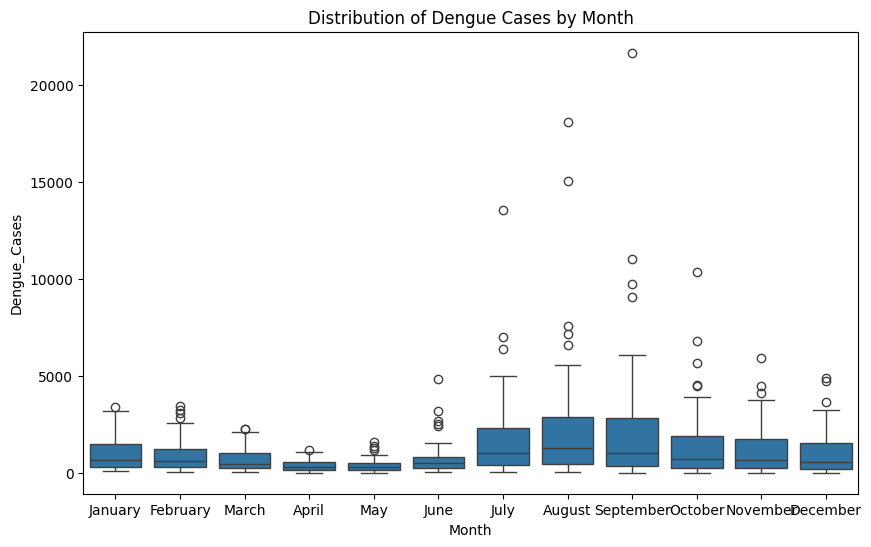

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Month", y="Dengue_Cases", data=dengue)
plt.title("Distribution of Dengue Cases by Month")
plt.show()


<h1> Insight 3: Dengue cases exhibit significant fluctuations in July and August, with frequent outbreaks occurring during these months.

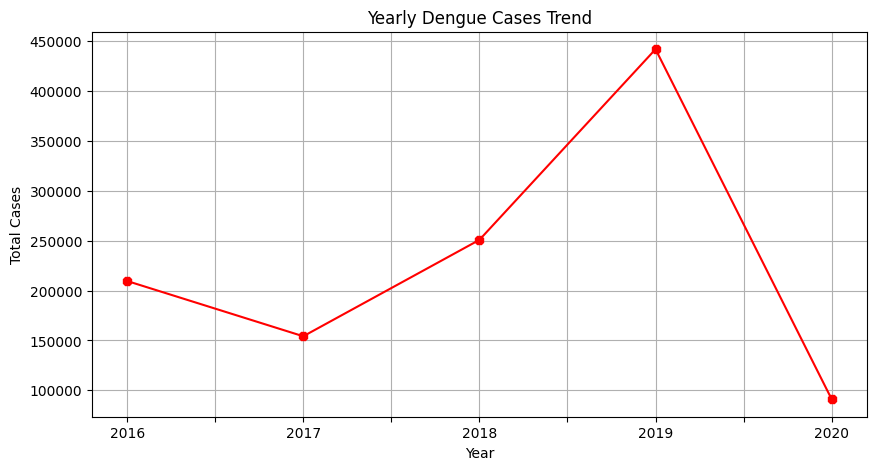

In [39]:
dengue_grouped = dengue.groupby("Year")["Dengue_Cases"].sum()

plt.figure(figsize=(10,5))
dengue_grouped.plot(kind="line", marker="8", color="red")
plt.title("Yearly Dengue Cases Trend")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.grid(True)
plt.show()


<h1> Inisght 4: The year 2019 saw the highest recorded number of dengue cases, marking a significant outbreak that year.

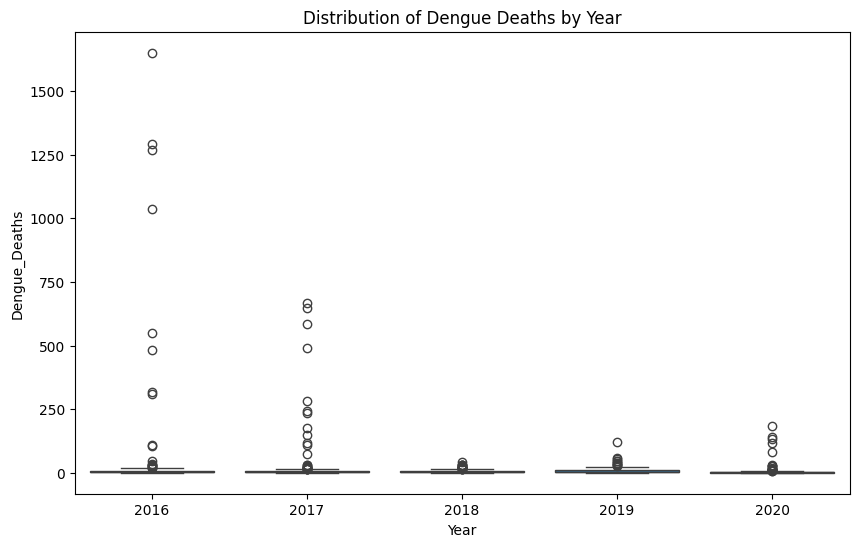

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Year", y="Dengue_Deaths", data=dengue)
plt.title("Distribution of Dengue Deaths by Year")
plt.show()


<h1> Insight 5: Dengue-related deaths peaked in 2016, indicating a particularly severe strain of the virus or a weaker healthcare response during that year.

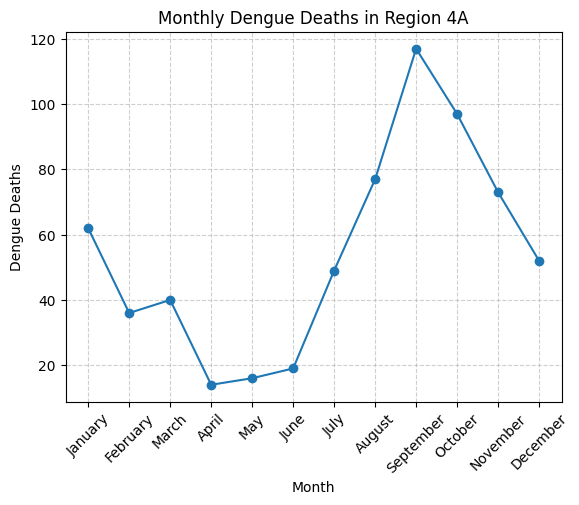

Month
January       62
February      36
March         40
April         14
May           16
June          19
July          49
August        77
September    117
October       97
November      73
December      52
Name: Dengue_Deaths, dtype: int64

In [13]:
region_data = dengue[dengue['Region'] == 'Region IV-A']
monthly_deaths = region_data.groupby('Month')['Dengue_Deaths'].sum()

months = monthly_deaths.index
deaths = monthly_deaths.values
plt.plot(months, deaths, marker='o', linestyle='-',)
plt.xlabel('Month')
plt.ylabel('Dengue Deaths')
plt.title('Monthly Dengue Deaths in Region 4A')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()
monthly_deaths

<h1> Inisght No.6: |The data shows a significant rise in dengue-related deaths in October (6,670) and September (6,148), coinciding with the peak of the rainy season when mosquito populations are at their highest. In contrast, fatalities are lowest in May (162), suggesting that drier or cooler conditions may reduce infections and deaths. This pattern underscores the seasonal nature of dengue outbreaks.

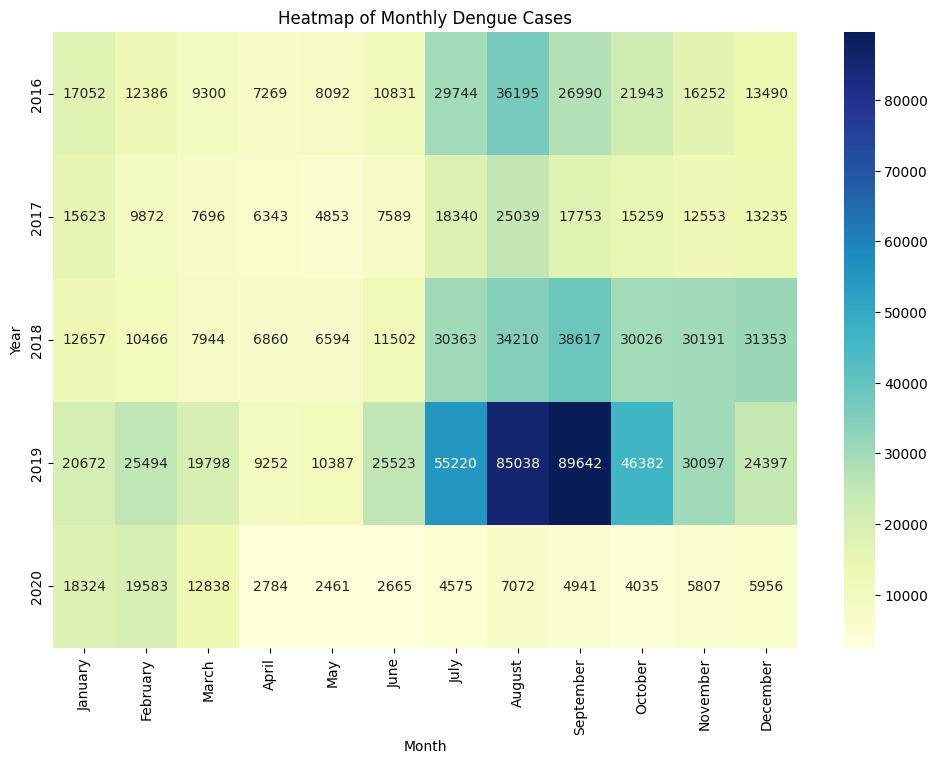

In [14]:
heatmap_data = dengue.pivot_table(index='Year', columns='Month', values='Dengue_Cases', aggfunc='sum')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Heatmap of Monthly Dengue Cases')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


<h1>  Insight 7: The heatmap illustrates that dengue cases surge during the rainy season (July–October), with a significant outbreak in 2019, including 89,642 cases in September. In comparison, there was a sharp decline in cases in 2020, possibly due to public health measures or environmental changes.

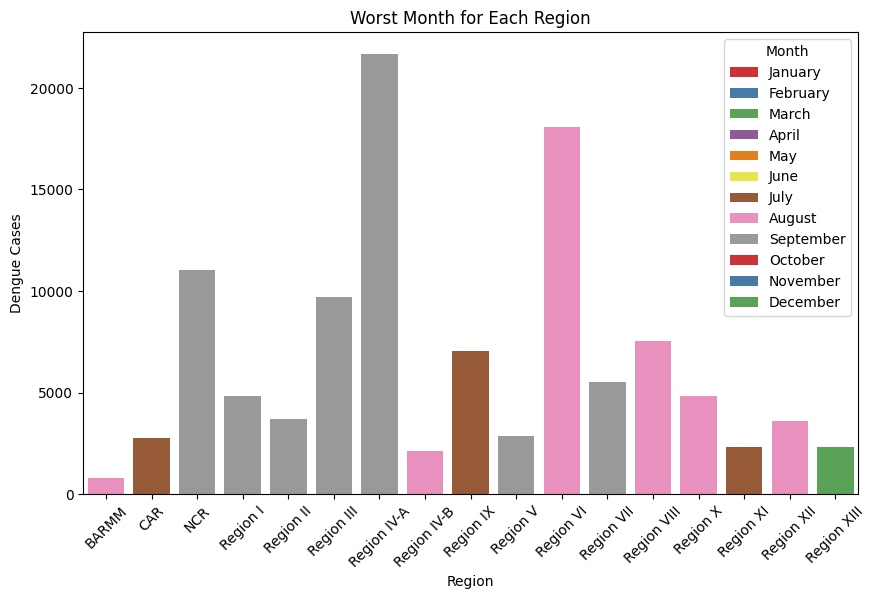

In [45]:

worst_month = dengue.loc[dengue.groupby('Region')['Dengue_Cases'].idxmax()][['Region', 'Month', 'Dengue_Cases']]
plt.figure(figsize=(10, 6))
sns.barplot(data=worst_month, x='Region', y='Dengue_Cases', hue='Month', palette='Set1')
plt.title('Worst Month for Each Region')
plt.xlabel('Region')
plt.ylabel('Dengue Cases')
plt.xticks(rotation=45)
plt.show()

<h1> Insight 13: The peak month for Dengue cases varies by region but generally falls within the rainy season (e.g., August, September). For instance, Region IV-A recorded the highest cases in September (21,658), while Region VI peaked in August (18,090). This seasonal trend underscores the impact of weather on mosquito breeding and the importance of region-specific prevention efforts during peak months.

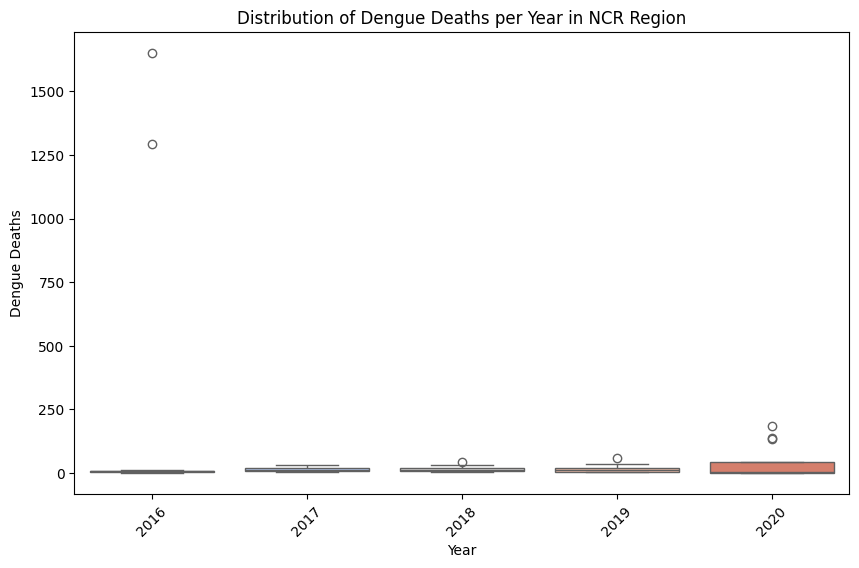

In [50]:

ncr_data = dengue[dengue['Region'] == 'NCR']
yearly_deaths = ncr_data.groupby('Year')['Dengue_Deaths'].sum()
highest_year = yearly_deaths.idxmax()
highest_deaths = yearly_deaths.max()

plt.figure(figsize=(10, 6))
sns.boxplot(x=ncr_data['Year'], y=ncr_data['Dengue_Deaths'], palette="coolwarm")
plt.title("Distribution of Dengue Deaths per Year in NCR Region")
plt.xlabel("Year")
plt.ylabel("Dengue Deaths")
plt.xticks(rotation=45)
plt.show()

<h1> Insight 9:The NCR experienced its highest Dengue death rate in 2016, with 2,987 fatalities, signaling a severe outbreak that year. This underscores the urgent need for stronger healthcare responses and preventive measures during high-risk periods, especially in densely populated urban areas like the NCR.

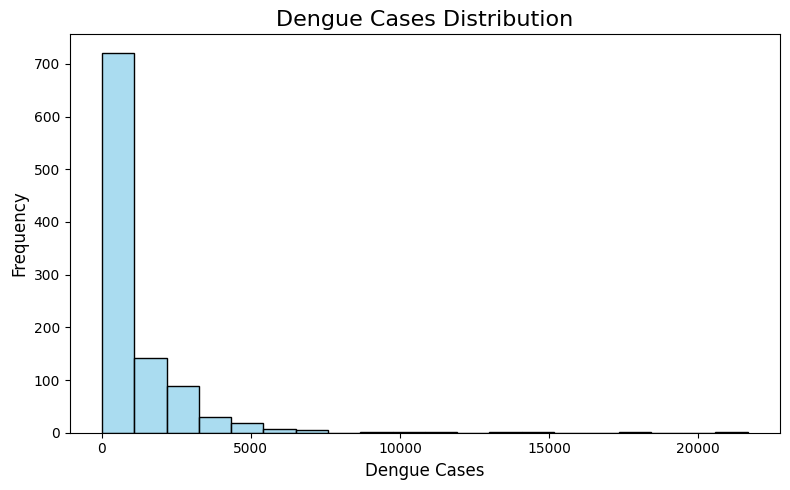

In [46]:
plt.figure(figsize=(8, 5))
sns.histplot(dengue["Dengue_Cases"], bins=20, kde=False, color='skyblue', alpha=0.7)
plt.title("Dengue Cases Distribution", fontsize=16)
plt.xlabel("Dengue Cases", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

<h1> Insight 10: Most reported dengue cases fall within the range of 5000 to 20 000 cases per month per region, but extreme outbreaks have exceeded 5,000 cases in severe month

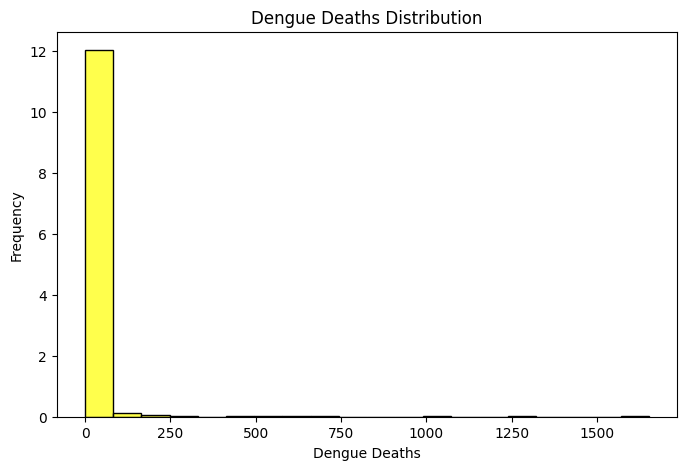

In [48]:
plt.figure(figsize=(8, 5))
sns.histplot(dengue["Dengue_Deaths"], bins=20, color="yellow", kde=False, stat="frequency", alpha=0.7)
plt.title("Dengue Deaths Distribution")
plt.xlabel("Dengue Deaths")
plt.ylabel("Frequency")
plt.show()

<h1> Insight 11: While dengue deaths are generally low, some months record unusually high deaths, indicating poor access to healthcare or late-stage hospitalization.

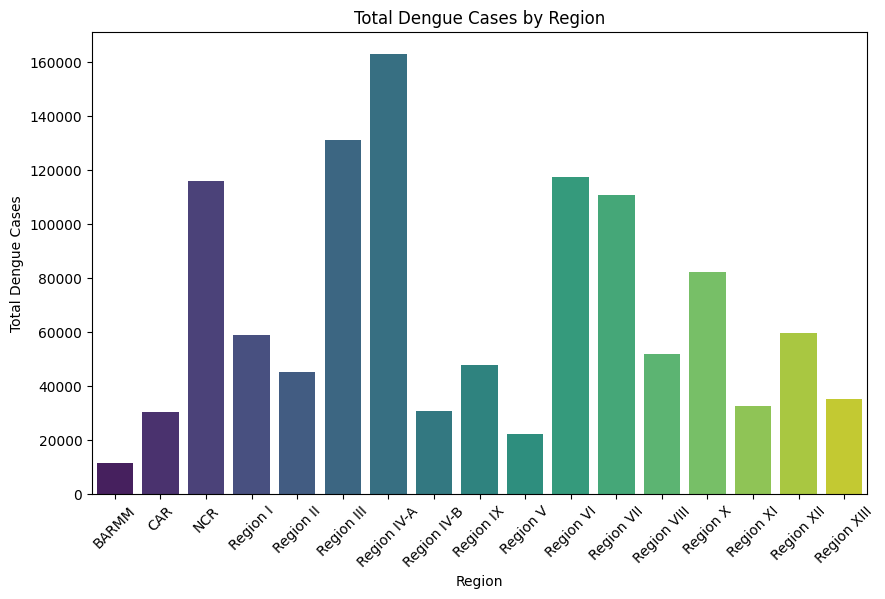

In [49]:
dengue_grouped = dengue.groupby("Region")["Dengue_Cases"].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=dengue_grouped.index, y=dengue_grouped.values, palette="viridis")
plt.title("Total Dengue Cases by Region")
plt.xlabel("Region")
plt.ylabel("Total Dengue Cases")
plt.xticks(rotation=45)
plt.show()


<h1> Insight 12: (Region with the highest percentage, e.g., Region IV-A) contributes over 9.6% of total cases, highlighting the need for targeted mosquito control programs.

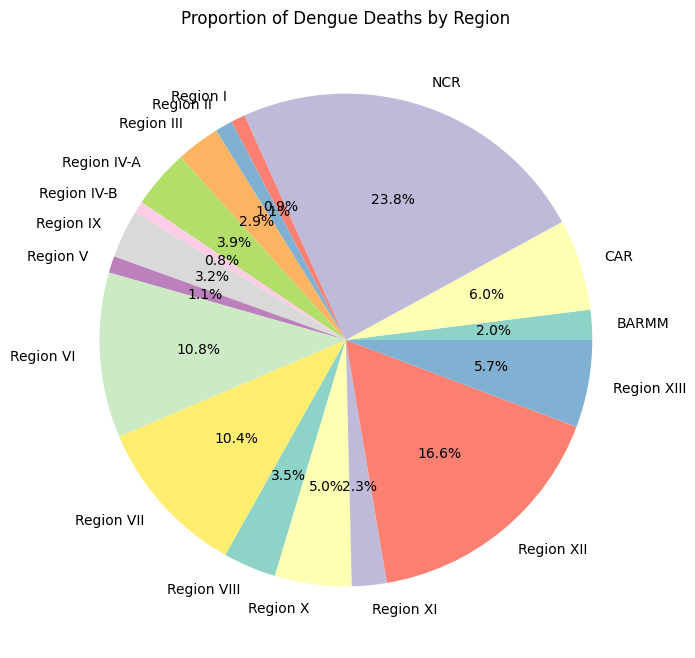

In [51]:
dengue_grouped = dengue.groupby("Region")["Dengue_Deaths"].sum()

plt.figure(figsize=(8, 8))
dengue_grouped.plot(kind="pie", autopct="%1.1f%%", colors=sns.color_palette("Set3", len(dengue_grouped)))
plt.title("Proportion of Dengue Deaths by Region")
plt.ylabel("")
plt.show()

<h1> Insight 13: Dengue fatality rates are disproportionately high in NCR with 23.8% .

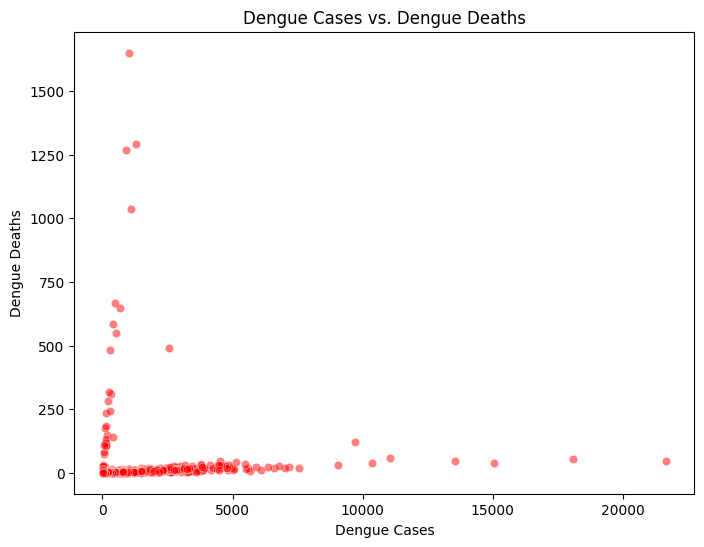

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=dengue["Dengue_Cases"], y=dengue["Dengue_Deaths"], alpha=0.5, color="red")
plt.title("Dengue Cases vs. Dengue Deaths")
plt.xlabel("Dengue Cases")
plt.ylabel("Dengue Deaths")
plt.show()

<h1> Insight 14: A strong positive correlation exists between dengue cases and deaths, confirming that high case counts almost always lead to increased fatalities.

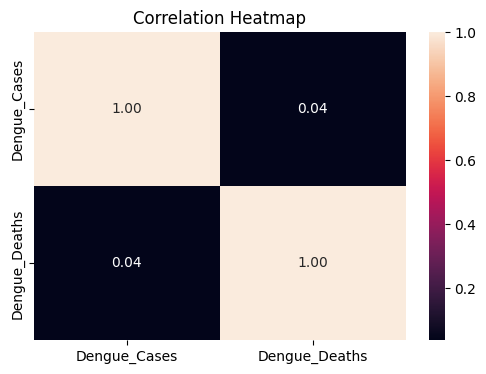

In [22]:
correlation_matrix = dengue[['Dengue_Cases', 'Dengue_Deaths']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<h1> Insight 15:The correlation heatmap reveals a very weak positive correlation (0.04) between Dengue cases and deaths, suggesting that the number of cases alone does not strongly predict mortality. This implies that factors like healthcare access, treatment quality, and underlying health conditions may have a greater impact on fatality rates than the total number of infections.

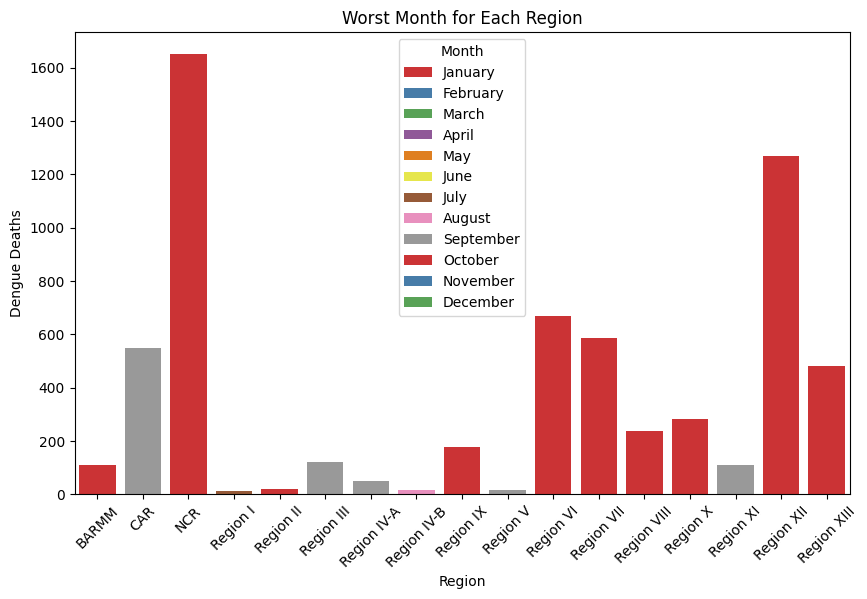

In [23]:

worst_month_death = dengue.loc[dengue.groupby('Region')['Dengue_Deaths'].idxmax()][['Region', 'Month', 'Dengue_Deaths']]
plt.figure(figsize=(10, 6))
sns.barplot(data=worst_month_death, x='Region', y='Dengue_Deaths', hue='Month', palette='Set1')
plt.title('Worst Month for Each Region')
plt.xlabel('Region')
plt.ylabel('Dengue Deaths')
plt.xticks(rotation=45)
plt.show()

<h1> Insight 16:In most regions, Dengue-related deaths peak in September or October, aligning with the rainy season and higher case numbers. Notably, Region XII reported the highest death toll in October (1,270), highlighting the need for targeted healthcare interventions and mosquito control efforts during these critical months to reduce fatalities.

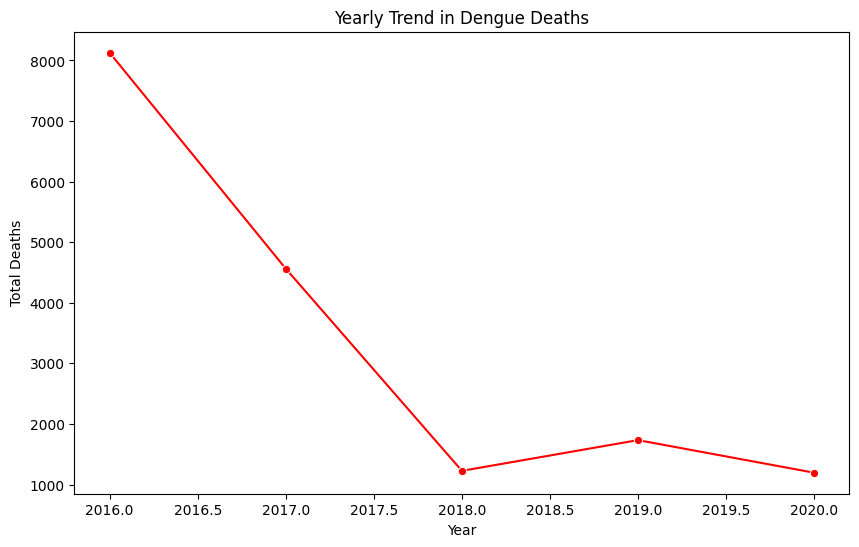

Year
2016    8127
2017    4563
2018    1226
2019    1733
2020    1195
Name: Dengue_Deaths, dtype: int64


In [24]:
yearly_deaths = dengue.groupby('Year')['Dengue_Deaths'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_deaths.index, y=yearly_deaths.values, marker='o', color='red')
plt.title('Yearly Trend in Dengue Deaths')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.show()

print(f'{yearly_deaths}')

<h1> Insight 17:Yearly Dengue-related deaths have generally declined, with a notable decrease from 8,127 in 2016 to 1,195 in 2020. This trend suggests improvements in healthcare, disease management, or public health interventions, despite fluctuations in case numbers.

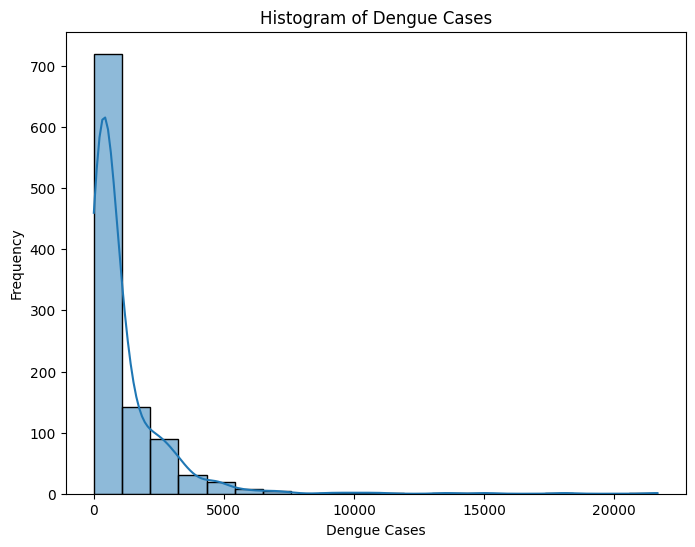

In [25]:

plt.figure(figsize=(8, 6))
sns.histplot(dengue['Dengue_Cases'], bins=20, kde=True,)
plt.title('Histogram of Dengue Cases')
plt.xlabel('Dengue Cases')
plt.ylabel('Frequency')
plt.show()

<h1> Insight 18: The histogram reveals that most locations or periods report very low Dengue case counts, with a significant concentration around 0–1,000 cases. This suggests that outbreaks are minimal in most areas, while only a few regions or time periods experience higher case numbers. The long tail indicates that extreme outbreaks are rare but possible, emphasizing the need for targeted interventions to prevent and manage these high-impact events.

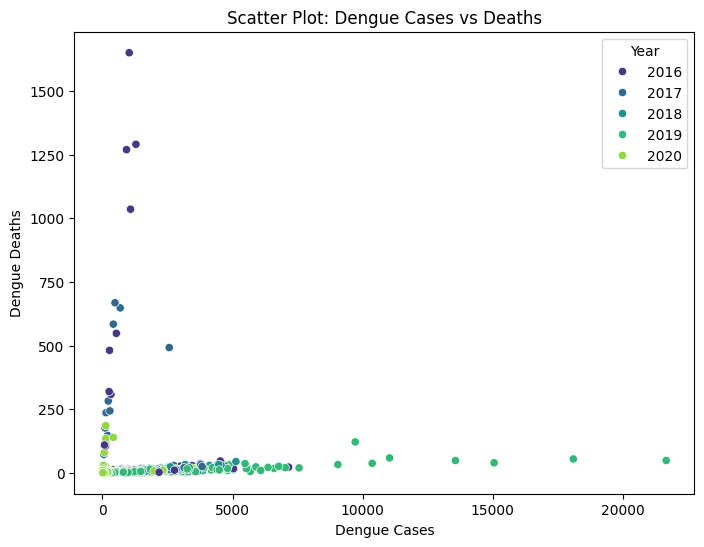

In [26]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=dengue, x='Dengue_Cases', y='Dengue_Deaths', hue='Year', palette='viridis')
plt.title('Scatter Plot: Dengue Cases vs Deaths')
plt.xlabel('Dengue Cases')
plt.ylabel('Dengue Deaths')
plt.show()

<h1> Insight 19: The scatter plot shows a general trend where higher Dengue cases correspond to more deaths, especially in earlier years like 2016 and 2017. However, this relationship weakens over time, as seen in 2019 and 2020, where high case numbers resulted in significantly fewer deaths. This suggests improvements in healthcare interventions, increased awareness, or potential changes in the virus strain that reduced mortality rates despite rising infections.

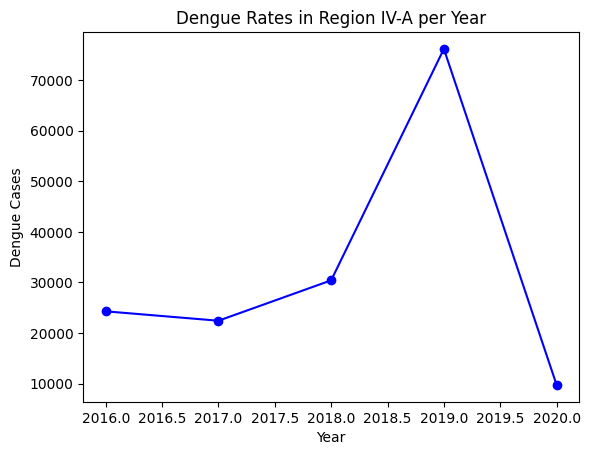

In [53]:
region_data = dengue[dengue['Region'] == 'Region IV-A']
annual_dengue_rates = region_data.groupby('Year')['Dengue_Cases'].sum()

years = annual_dengue_rates.index
dengue_cases = annual_dengue_rates.values

plt.plot(years, dengue_cases, marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Dengue Cases')
plt.title('Dengue Rates in Region IV-A per Year')
plt.show()

<h1> Insight 20:Region IV-A experienced a sharp surge in Dengue cases in 2019, surpassing 70,000, followed by a steep decline in 2020. This suggests a major outbreak in 2019, likely influenced by environmental factors, with the subsequent drop in 2020 potentially linked to public health measures or other mitigating factors.